In [ ]:
#! pip3 install shap

In [1]:
import shap
import pandas as pd
import numpy as np
import pickle

In [2]:
y = pd.read_csv('Assets/y.csv')
X = pd.read_csv('Assets/X.csv')

In [79]:
original_model = pickle.load(open('Assets/original_model.pkl','rb'))
ten_percent_model = pickle.load(open('Assets/ten_percent_model.pkl','rb'))
compounded_model = pickle.load(open('Assets/compounded_model.pkl','rb'))

model_no_creidt = pickle.load(open('Assets/normal_no_creidt.pkl','rb'))

In [60]:
sample_X = X.sample(n = 1000, random_state= 42)

sample_X.columns = ['ID', 'CREDIT_SCORE_TYPE_3', 'CREDIT_SCORE_TYPE_2', 'CREDIT_SCORE_TYPE_1',
       'AMT_GOODS_PRICE', 'AMT_ANNUITY', 'NAME_CONTRACT_TYPE_Cash loans',
       'NAME_CONTRACT_TYPE_Revolving loans', 'FLAG_DOCUMENT_3', 'DAYS_BIRTH',
       'MALE', 'FEMALE', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'NAME_INCOME_TYPE_Pensioner',
       'ORGANIZATION_TYPE_XNA', 'FLAG_EMP_PHONE', 'DAYS_EMPLOYED',
       'REG_CITY_NOT_WORK_CITY', 'NAME_INCOME_TYPE_Working', 'DAYS_ID_PUBLISH',
       'HIGHER_EDUCATION', 'DAYS_REGISTRATION',
       'REG_CITY_NOT_LIVE_CITY', 'DAYS_LAST_PHONE_CHANGE',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'OCCUPATION_TYPE_Laborers', 'EMERGENCYSTATE_MODE_No',
       'OCCUPATION_TYPE_Drivers', 'HOUSETYPE_MODE_block of flats', 'PRINCIPAL_COMP_0', 'PRINCIPAL_COMP_1']

In [61]:
sample_y = y.sample(n = 1000 , random_state= 42)

## Original Model

In [62]:
%time
explainer = shap.TreeExplainer(original_model.best_estimator_)
shap_values = explainer.shap_values(sample_X)

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 11 µs


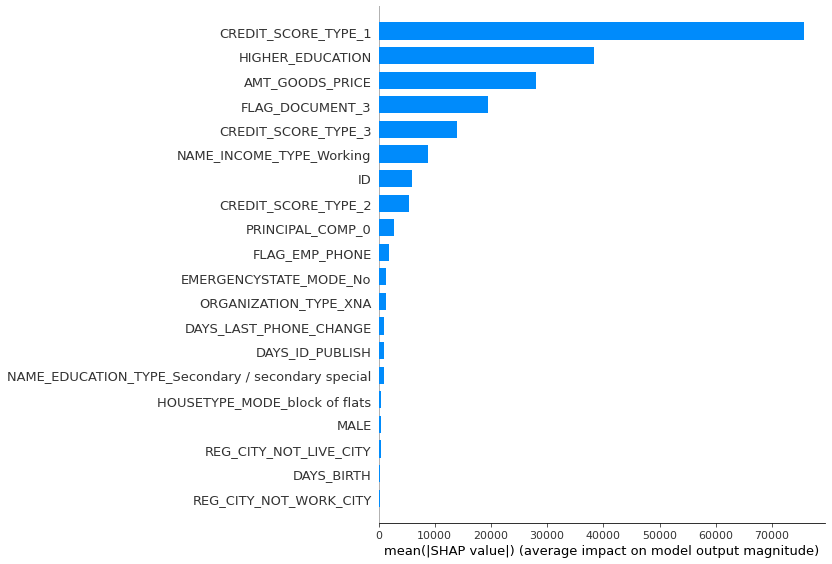

In [69]:
shap.summary_plot(shap_values, sample_X.values, plot_type="bar", feature_names = sample_X.columns , title= 'Top Features')

## 10 % of Target Model

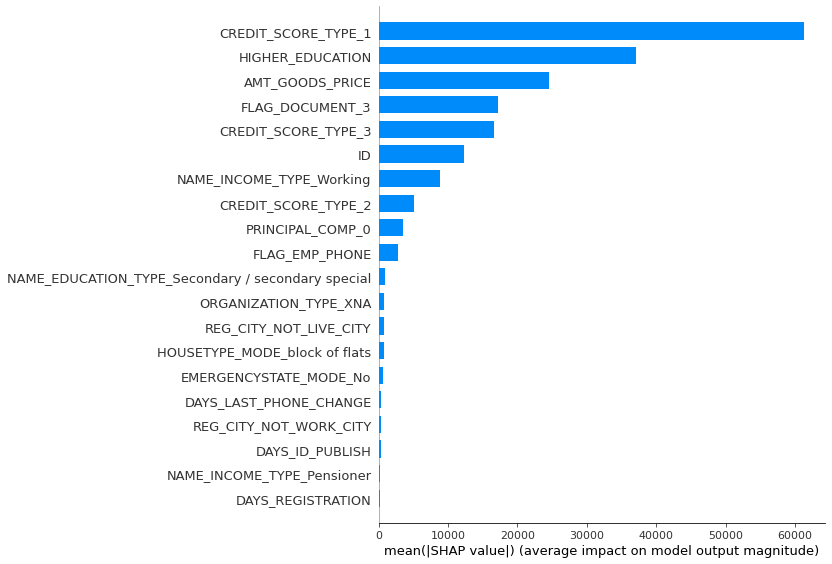

In [84]:
explainer = shap.TreeExplainer(ten_percent_model.best_estimator_)
shap_values = explainer.shap_values(sample_X)
shap.summary_plot(shap_values, sample_X.values, plot_type="bar", feature_names = sample_X.columns , title= 'Top Features')

## Compounded Interest Scale

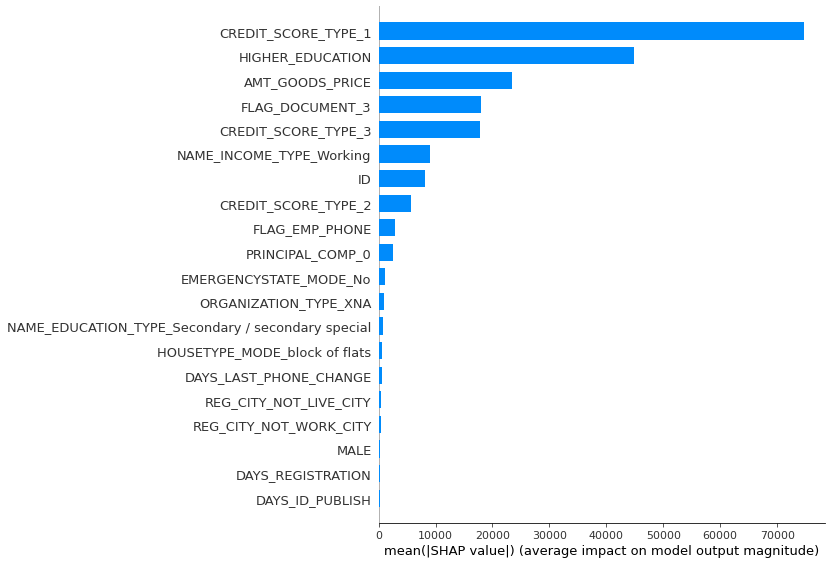

In [85]:
explainer = shap.TreeExplainer(compounded_model.best_estimator_)
shap_values = explainer.shap_values(sample_X)
shap.summary_plot(shap_values, sample_X.values, plot_type="bar", feature_names = sample_X.columns , title= 'Top Features')

## No Credit Score Model

In [91]:
no_credit = sample_X.drop(columns = ['CREDIT_SCORE_TYPE_3','CREDIT_SCORE_TYPE_2','CREDIT_SCORE_TYPE_1'])

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 5.25 µs


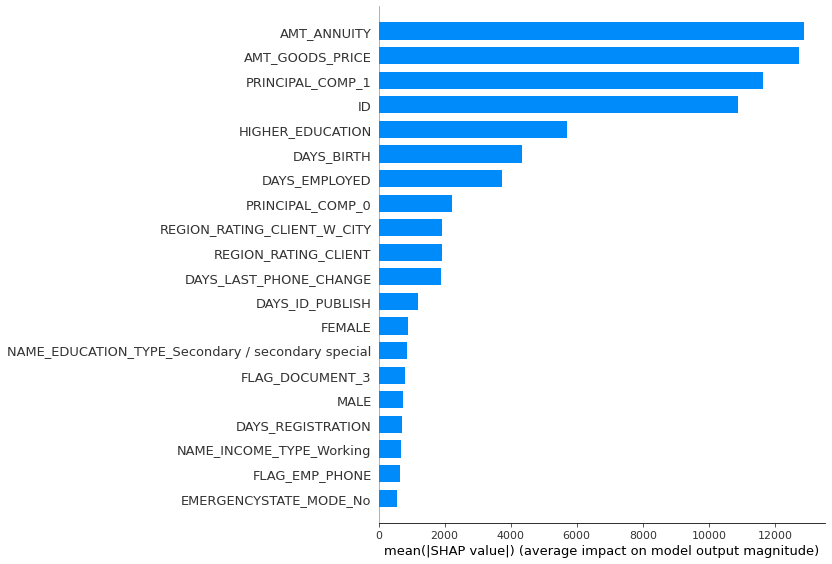

In [92]:
%time
explainer = shap.TreeExplainer(model_no_creidt.best_estimator_)
shap_values = explainer.shap_values(no_credit)
shap.summary_plot(shap_values, no_credit.values, plot_type="bar", feature_names = no_credit.columns , title= 'Top Features')